In [1]:
#importing required packages

import uproot
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import sys
from multiprocessing import Process
from skhep.math.vectors import LorentzVector, Vector3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

from IPython.display import display, Latex

# the package of my own defined functions
# with importing you gotta import every module that you used in your function in your functions file like numpy
# from functions import *

%matplotlib inline

In [2]:
# Note that when the format is ipynb then importing doesn't work, I don't know why. So this is the alternative way

# execfile('file.py') in Python 2
exec(open('functions.py').read()) #in Python 3

b


## Cuts

In [3]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==myBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005534 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"


# format of labels
# label including this form2 will have these properties
form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


mcNBB = 180000 * 2. *199;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 7.164e+07
MC sample equivalent to 65.13 fb-1


In [4]:
# Generated Modes (Bmodes)
# Note: be careful this list of eta modes doesn't have some of the modes like 301019
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

True  False


$ $
$ $

using all cpus, it's not working now

In [ ]:
def task():
    file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")
    df_charged = pd.DataFrame()
    for batch in file_charged.iterate(step_size="100 MB", library='pd'):
        df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
    df_charged

In [ ]:
process = Process(target=task)

In [ ]:
process.start()

In [ ]:
with process.pool(process.cpu_counts()) as pool:
    pool.map(function, list(row))

## Data loading

In [4]:
%%time
# I removed charged particles in ROE form this data set
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')
data

CPU times: user 13.3 ms, sys: 1.26 s, total: 1.28 s
Wall time: 2 s


__experiment__  __run__  __event__  __production__  \
charged 0                 1003        0    8640457           24816   
        1                 1003        0    8640457           24816   
        2                 1003        0    8640457           24816   
        12                1003        0   12624230           24816   
        13                1003        0   12624230           24816   
...                        ...      ...        ...             ...   
mixed   431043            1003        0     308753           25056   
        431044            1003        0     308753           25056   
        431045            1003        0    1175564           25056   
        431046            1003        0    1175564           25056   
        431048            1003        0    1175564           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 0                   0                3         1.0  10.579557   
        1                   1                3         1.0  10.579557   
        2                   2                3         1.0  10.579557   
        12                  0                9         1.0  10.579557   
        13                  1                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   431043              7                9         1.0  10.579557   
        431044              8                9         1.0  10.579557   
        431045              0                9         1.0  10.579557   
        431046              1                9         1.0  10.579557   
        431048              3                9         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 0         -101002.0      1021.0  ...          NaN                NaN   
        1         -101002.0      1021.0  ...          NaN                NaN   
        2         -101002.0      1021.0  ...          NaN                NaN   
        12        -101001.0      1022.0  ...          NaN                NaN   
        13        -101001.0      1022.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   431043        -99.0       -99.0  ...          NaN                NaN   
        431044        -99.0       -99.0  ...          NaN                NaN   
        431045        -99.0       -99.0  ...          NaN                NaN   
        431046        -99.0       -99.0  ...          NaN                NaN   
        431048        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 0               NaN                NaN          NaN   
        1               NaN                NaN          NaN   
        2               NaN                NaN          NaN   
        12              NaN                NaN          NaN   
        13              NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   431043          NaN                NaN          NaN   
        431044          NaN                NaN          NaN   
        431045          NaN                NaN          NaN   
        431046          NaN                NaN          NaN   
        431048          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 0                     NaN          NaN                NaN   
        1                     NaN          NaN                NaN   
        2                     NaN          NaN                NaN   
        12                    NaN          NaN                NaN   
        13                    NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   431043                NaN          NaN                NaN   
        431044              

In [5]:
%%time
# removing some of the entries, keep charged B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', 868)

Tree = pd.read_pickle('eta_data.pkl')
Tree

CPU times: user 3.58 ms, sys: 60.8 ms, total: 64.4 ms
Wall time: 101 ms


__experiment__  __run__  __event__  __production__  \
charged 21                1003        0   12624622           24816   
        23                1003        0   12624622           24816   
        119               1003        0   12125220           24816   
        120               1003        0   12125220           24816   
        121               1003        0   12125220           24816   
...                        ...      ...        ...             ...   
mixed   430606            1003        0      72016           25056   
        430795            1003        0     878715           25056   
        430798            1003        0     878715           25056   
        430837            1003        0     657322           25056   
        430838            1003        0     657322           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 21                  0                5         1.0  10.579557   
        23                  2                5         1.0  10.579557   
        119                 0                9         1.0  10.579557   
        120                 1                9         1.0  10.579557   
        121                 2                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   430606              1                9         1.0  10.579557   
        430795              0                6         1.0  10.579557   
        430798              3                6         1.0  10.579557   
        430837              0                3         1.0  10.579557   
        430838              1                3         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 21          -1024.0      1001.0  ...          NaN                NaN   
        23          -1024.0      1001.0  ...          NaN                NaN   
        119         -1021.0      1001.0  ...          NaN                NaN   
        120         -1021.0      1001.0  ...          NaN                NaN   
        121         -1021.0      1001.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   430606        -99.0       -99.0  ...          NaN                NaN   
        430795        -99.0       -99.0  ...          NaN                NaN   
        430798        -99.0       -99.0  ...          NaN                NaN   
        430837        -99.0       -99.0  ...          NaN                NaN   
        430838        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 21              NaN                NaN          NaN   
        23              NaN                NaN          NaN   
        119             NaN                NaN          NaN   
        120             NaN                NaN          NaN   
        121             NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   430606          NaN                NaN          NaN   
        430795          NaN                NaN          NaN   
        430798          NaN                NaN          NaN   
        430837          NaN                NaN          NaN   
        430838          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 21                    NaN          NaN                NaN   
        23                    NaN          NaN                NaN   
        119                   NaN          NaN                NaN   
        120                   NaN          NaN                NaN   
        121                   NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   430606                NaN          NaN                NaN   
        430795              

# Analysis

In [7]:
# explanation for each cut

textstr = r'For all cuts one of Bs reconstructed as $D^{(*)}l\nu$  and the other one as $D^{(*)}\eta l\nu$' + '\n, no charged particles in ROE'
textstr0 = r'Only candidate0 which is the best candidate is included'
textstr1 = 'Best candidate \n, and the fourth particle in B decay should have invariant mass of eta \n, and should decay to a pair of $\gamma$'
textstr2 = 'Best candidate \n, and cosBY<1.1 and cosBY>-1.9'
textstr3 = 'Best candidate \n, and new range for cosBY'
textstr4 = 'Mix of cuts one and two'
text = [textstr0, textstr1, textstr2, textstr3, textstr4]

$B^+B^-$

In [18]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B plus meaning I chose for one of them only Dlnu then the other one to be D(*)0etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [300, 400]
# add this cut later: samplesBp1 = aTree.query(mycand+AND+BpBmcut+AND+Bprec_eta)

samplesBp0 = Tree.loc['charged']
samplesBp1 = Tree.loc['charged'].query(cand0)
samplesBp2 = Tree.loc['charged'].query(cand0+AND+etacut)
samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts)
# samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts_new)
samplesBp4 = Tree.loc['charged'].query(cand0+AND+y4scuts+AND+etacut)
samplesBp_cuts = [samplesBp1, samplesBp2, samplesBp3, samplesBp4]

In [20]:
%%time
tree_p = sig_bkg_counter('charged',samplesBp_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0:  3896       3896          480         3416          7.69            1.0000        0.016822        175
--------------------------------------------------------------------------------------------------------------------
cut1:  3803       3803          479         3324          7.77            0.9979        0.017014        174
--------------------------------------------------------------------------------------------------------------------
cut2:  2441       2441          392         2049          7.93            0.8167        0.017652        123
--------------------------------------------------------------------------------------------------------------------
cut3:  2385       2385          391         1994          8.01            0.8146  

In [ ]:
tree_p

In [ ]:
tree_p.loc['cut0'].loc['background']

$B^0\bar{B0}$

In [ ]:
Tree.loc['mixed']['__candidate__'].value_counts()

In [ ]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B zero meaning I chose for one of them only D(*)lnu then the other one to be D(*)-etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [100, 200]

samplesBz0 = Tree.loc['mixed']
samplesBz1 = Tree.loc['mixed'].query(cand0)
samplesBz2 = Tree.loc['mixed'].query(cand0+AND+etacut)
samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts)
# samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts_new)
samplesBz4 = Tree.loc['mixed'].query(cand0+AND+y4scuts+AND+etacut)
samplesBz_cuts = [samplesBz0, samplesBz1, samplesBz2, samplesBz3, samplesBz4]

In [ ]:
tree0 = sig_bkg_counter('mixed',samplesBz_cuts)

In [ ]:
tree0

### Why isSignal is too strict

In [ ]:
samplesBp0.query('(isSignal!=1) and (nROE_Ch==1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

In [ ]:
pd.set_option('display.max_columns', 868)

samplesBz0.query('(isSignal!=1) and ( (aB0Mode%10000 in [1017,1018,1035,1036]) or (aBbar0Mode%10000 in [1017,1018,1035,1036]) )')

In [ ]:
#### charged B
# InvM of eta
eta_InvM_bothsig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

In [ ]:
#### mixed B
# InvM of eta
eta_InvM_bothsig0 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

#### Why do we get some enteries where my signal is background and basf2 signal is signal (the red plot)

In [ ]:
tree_p.loc['cut1'].loc['background'].query('isSignal==1')

In [ ]:
tree0.loc['cut1'].loc['background'].query('isSignal==1')

In [ ]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked')
    plt.xlabel('Invariant mass of eta', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

In [ ]:
# BpBm
# cosBY
eta_InvM_bothsig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothsig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_mysig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothbkg1 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_basf2sig1 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

In [ ]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
    plt.xlabel('cosBY', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

### We're getting better results without 'y4scuts': let's check the variable 'cosBY'

In [ ]:
etamodes = [1019,1020,1039,1040]
df1 = df_charged[(df_charged['aBplusMode']%10000).isin(etamodes)]
print(len(df1['aBplusMode']))
df2 = df_charged.loc[df_charged.apply(lambda x: ( ((x.aBplusMode%10000 in etamodes) or (abs(x.aBminusMode)%10000 in etamodes)) and ((x.pi4_B0_isSignal==1) or (x.pi4_B1_isSignal==1)) ), axis=1)]
len(df2['aBplusMode'])

In [ ]:
len(tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-250)<160')['B0_decayModeID'])
len(tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['B0_decayModeID'])

In [ ]:
tree_p.loc['cut0'].query('abs(B0_decayModeID-1650)<60')['B0_decayModeID']

In [ ]:
print(form_label)

In [ ]:
# cosBY for Dlnu
cosBY0p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_sig = pd.concat([cosBY0p_Dl_sig,cosBY1p_Dl_sig])

cosBY0p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_bkg = pd.concat([cosBY0p_Dl_bkg, cosBY1p_Dl_bkg])

# cosBY for Detalnu
cosBY0p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_sig = pd.concat([cosBY0p_Detal_sig,cosBY1p_Detal_sig])

cosBY0p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_bkg = pd.concat([cosBY0p_Detal_bkg, cosBY1p_Detal_bkg])


# plt.figure(figsize=(15, 4))
# ax_log = plt.subplot(121)
# count, bins, _ = ax_log.hist([cosBY0p_bkg, cosBY0p_sig], label=['background', 'signal'], bins=50)
# ax_log.set_yscale('log')
# print(count[0])

plt.figure(figsize=(20, 10))
ax_linear = plt.subplot(221)
count_cosBYp_Dl, binedges_cosBYp_Dl, _ = ax_linear.hist([cosBYp_Dl_bkg, cosBYp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf Dl\nu$', fontdict=form_title)
plt.legend()

ax_linear = plt.subplot(222)
count_cosBYp_Detal, binedges_cosBYp_Detal, _ = ax_linear.hist([cosBYp_Detal_bkg, cosBYp_Detal_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf D\eta l\nu$', fontdict=form_title)
plt.legend()

plt.subplots_adjust(bottom=-0.1)

plt.subplot(223)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Dl_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.subplot(224)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Detal_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.show()

In [ ]:
len(binedges_cosBYp_Dl)

In [ ]:
print('bin count length', len(count_cosBYp_Dl[0]), 'bin edge length', len(binedges_cosBYp_Dl[:48]))

#### The idea is to define a for loop to find the ratio of signal to background in different parts of the above histogram.

In [ ]:
# window_list
window_cosBY=[2,4,6,8,12,16,20,26,32,40,48]
exec(open('functions.py').read())

# Dlnu
s_cosBYp_Dl, r_cosBYp_Dl, ranges_cosBYp_Dl= variable_best_range(window_cosBY, count_cosBYp_Dl, binedges_cosBYp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Dl, ranges_cosBYp_Dl, binedges_cosBYp_Dl)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf Dl\nu$', fontdict=form_title)

plt.grid(True)
plt.show()

In [ ]:
# Detalnu
s_cosBYp_Detal, r_cosBYp_Detal, ranges_cosBYp_Detal= variable_best_range(window_cosBY, count_cosBYp_Detal, binedges_cosBYp_Detal)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Detal, ranges_cosBYp_Detal, binedges_cosBYp_Detal)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf D\eta l\nu$', fontdict=form_title)


plt.grid(True)
plt.show()

In [ ]:
# Eextra_ROE
Eextra_ROEp_Dl_sig = tree_p.loc['cut0'].loc['signal']['Eextra_ROE']
Eextra_ROEp_Dl_bkg = tree_p.loc['cut0'].loc['background']['Eextra_ROE']

plt.figure(figsize=(15, 6))
count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl, _ = plt.hist([Eextra_ROEp_Dl_bkg, Eextra_ROEp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(0,1,0.01))
plt.xlabel('Eextra_ROE', fontdict=form_label)
plt.title('Energy of ROE when at least one of Bs is reconstructed as \n'+ r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)
plt.legend()

In [ ]:
window_Eextra = [6, 8, 10, 12, 16, 18, 28, 38, 58, 88]
# Dlnu
s_Eextra_ROEp_Dl, r_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl= variable_best_range(window_Eextra, count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('Eextra_ROE',window_Eextra, s_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)
plt.title('Finding the best range of Eextra_ROE when one of Bs reconstructed as \n' +  r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)

plt.show()

$ $
$ $

# signal and background for $\eta$ 

In [5]:
# reconstructed eta modes plus etaSB
l_eta_Bp = [1600,1700,2600,2700]
eta_Bp = list(i+1 for i in l_eta_Bp) + l_eta_Bp

l_eta_B0 = [1400,1500,2400,2500]
eta_B0 = list(i+1 for i in l_eta_B0) + l_eta_B0
eta_Bp, eta_B0

([1601, 1701, 2601, 2701, 1600, 1700, 2600, 2700],
 [1401, 1501, 2401, 2501, 1400, 1500, 2400, 2500])

In [6]:
# reconstructed pion0 modes plus pi0SB
l_pi0_Bp = [1300, 1200, 2300, 2200]
pi0_Bp = list(i+1 for i in l_pi0_Bp) + l_pi0_Bp

l_pi0_B0 = [1100, 1000, 2100, 2000]
pi0_B0 = list(i+1 for i in l_pi0_B0) + l_pi0_B0
pi0_Bp, pi0_B0

([1301, 1201, 2301, 2201, 1300, 1200, 2300, 2200],
 [1101, 1001, 2101, 2001, 1100, 1000, 2100, 2000])

In [7]:
# eta and etaSB modes reconstruction
df_eta_Bp = data.loc['charged'].query(
    f'((B0_decayModeID=={eta_Bp} & B1_decayModeID<500) | (B1_decayModeID=={eta_Bp} & B0_decayModeID<500))'
)

df_eta_B0 = data.loc['mixed'].query(
    f'((B0_decayModeID=={eta_B0} & B1_decayModeID<500) | (B1_decayModeID=={eta_B0} & B0_decayModeID<500))'
)

In [8]:
df_pi0_Bp = data.loc['charged'].query(
    f'((B0_decayModeID=={pi0_Bp} & B1_decayModeID<500) | (B1_decayModeID=={pi0_Bp} & B0_decayModeID<500))'
)

df_pi0_B0 = data.loc['mixed'].query(
    f'((B0_decayModeID=={pi0_B0} & B1_decayModeID<500) | (B1_decayModeID=={pi0_B0} & B0_decayModeID<500))'
)

In [9]:
# eta
# splitting signal and background ****charged B****

# background
dfp_bkg = df_eta_Bp.drop(
    df_eta_Bp[
        ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
        &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# splitting peaking and combinatoprial background
dfp_pkbkg = dfp_bkg[
    ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
    &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) ) 
]

dfp_combkg = dfp_bkg.drop(
    dfp_bkg[
        ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
        &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
dfp_sig = df_eta_Bp[
    ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
]


dfp = pd.concat([dfp_sig, dfp_pkbkg, dfp_combkg], keys=['signal', 'peaking background', 'combinatorial background'])
dfp

__experiment__  __run__  __event__  \
signal                   1400              1003        0   11916538   
                         1402              1003        0   11916538   
                         1404              1003        0   11916538   
                         1768              1003        0   27178608   
                         1772              1003        0   27178608   
...                                         ...      ...        ...   
combinatorial background 793407            1003        0   37491031   
                         793475            1003        0   33988240   
                         793501            1003        0   37329964   
                         793502            1003        0   37329964   
                         793505            1003        0   37329964   

                                 __production__  __candidate__  \
signal                   1400             24816              0   
                         1402             24816              2   
                         1404             24816              4   
                         1768             24816              4   
                         1772             24816              8   
...                                         ...            ...   
combinatorial background 793407           24820              7   
                         793475           24820              0   
                         793501           24820              0   
                         793502           24820              1   
                         793505           24820              4   

                                 __ncandidates__  __weight__       Ecms  \
signal                   1400                  9         1.0  10.579557   
                         1402                  9         1.0  10.579557   
                         1404                  9         1.0  10.579557   
                         1768                  9         1.0  10.579557   
                         1772                  9         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 793407                9         1.0  10.579557   
                         793475                2         1.0  10.579557   
                         793501                8         1.0  10.579557   
                         793502                8         1.0  10.579557   
                         793505                8         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   1400        -1001.0      1020.0  ...          NaN   
                         1402        -1001.0      1020.0  ...          NaN   
                         1404        -1001.0      1020.0  ...          NaN   
                         1768      -101003.0    101020.0  ...          NaN   
                         1772      -101003.0    101020.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 793407      -1036.0      1002.0  ...          NaN   
                         793475      -1002.0    101002.0  ...          NaN   
                         793501      -1002.0      1001.0  ...          NaN   
                         793502      -1002.0      1001.0  ...          NaN   
                         793505      -1002.0      1001.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   1400                  NaN          NaN   
                         1402                  NaN          NaN   
                         1404                  NaN          NaN   
                         1768                  NaN          NaN   
                         1772                  NaN          NaN   
...                                            ...          ...   
combinatorial background 793407                NaN          NaN   
             

In [10]:
# pi0
# splitting signal and background ****charged B****

# background
dfp_bkg_pi0 = df_pi0_Bp.drop(
    df_pi0_Bp[
        ( ((df_pi0_Bp['aBplusMode']%10000).isin([1008,1010,1028,1030])) | (abs(df_pi0_Bp['aBminusMode'])%10000).isin([1008,1010,1028,1030]) )
        &( (df_pi0_Bp['pi4_B0_isSignal']==1) | (df_pi0_Bp['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# splitting peaking and combinatoprial background
dfp_pkbkg_pi0 = dfp_bkg_pi0[
    ( (~(dfp_bkg_pi0['aBplusMode']%10000).isin([1008,1010,1028,1030])) & (~(abs(dfp_bkg_pi0['aBminusMode'])%10000).isin([1008,1010,1028,1030])) )
    &( (dfp_bkg_pi0['pi4_B0_isSignal']==1) | (dfp_bkg_pi0['pi4_B1_isSignal']==1) ) 
]

dfp_combkg_pi0 = dfp_bkg_pi0.drop(
    dfp_bkg_pi0[
        ( (~(dfp_bkg_pi0['aBplusMode']%10000).isin([1008,1010,1028,1030])) & (~(abs(dfp_bkg_pi0['aBminusMode'])%10000).isin([1008,1010,1028,1030])) )
        &( (dfp_bkg_pi0['pi4_B0_isSignal']==1) | (dfp_bkg_pi0['pi4_B1_isSignal']==1) )
    ].index
)

# signal
dfp_sig_pi0 = df_pi0_Bp[
    ( ((df_pi0_Bp['aBplusMode']%10000).isin([1008,1010,1028,1030])) | (abs(df_pi0_Bp['aBminusMode'])%10000).isin([1008,1010,1028,1030]) )
    &( (df_pi0_Bp['pi4_B0_isSignal']==1) | (df_pi0_Bp['pi4_B1_isSignal']==1) ) 
]


dfp_pi0 = pd.concat([dfp_sig_pi0, dfp_pkbkg_pi0, dfp_combkg_pi0], keys=['signal', 'peaking background', 'combinatorial background'])
dfp_pi0

__experiment__  __run__  __event__  \
signal                   2708              1003        0   19459682   
                         2709              1003        0   19459682   
                         4507              1003        0   12044508   
                         4508              1003        0   12044508   
                         5947              1003        0    8557148   
...                                         ...      ...        ...   
combinatorial background 793461            1003        0   31830488   
                         793462            1003        0   31830488   
                         793463            1003        0   31830488   
                         793503            1003        0   37329964   
                         793504            1003        0   37329964   

                                 __production__  __candidate__  \
signal                   2708             24816              6   
                         2709             24816              7   
                         4507             24816              0   
                         4508             24816              1   
                         5947             24816              1   
...                                         ...            ...   
combinatorial background 793461           24820              6   
                         793462           24820              7   
                         793463           24820              8   
                         793503           24820              2   
                         793504           24820              3   

                                 __ncandidates__  __weight__       Ecms  \
signal                   2708                  9         1.0  10.579557   
                         2709                  9         1.0  10.579557   
                         4507                  2         1.0  10.579557   
                         4508                  2         1.0  10.579557   
                         5947                  4         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 793461                9         1.0  10.579557   
                         793462                9         1.0  10.579557   
                         793463                9         1.0  10.579557   
                         793503                8         1.0  10.579557   
                         793504                8         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   2708      -101008.0    101001.0  ...         22.0   
                         2709      -101008.0    101001.0  ...         22.0   
                         4507        -1022.0    201008.0  ...          NaN   
                         4508        -1022.0    201008.0  ...          NaN   
                         5947      -101001.0      1030.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 793461      -1001.0      1021.0  ...          NaN   
                         793462      -1001.0      1021.0  ...          NaN   
                         793463      -1001.0      1021.0  ...          NaN   
                         793503      -1002.0      1001.0  ...          NaN   
                         793504      -1002.0      1001.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   2708                 25.0         22.0   
                         2709                 25.0         22.0   
                         4507                  NaN          NaN   
                         4508                  NaN          NaN   
                         5947                  NaN          NaN   
...                                            ...          ...   
combinatorial background 793461                NaN          NaN   
             

In [11]:
# eta
# splitting signal and background ****mixed B****

# background
df0_bkg = df_eta_B0.drop(
    df_eta_B0[
        ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
        &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
df0_pkbkg = df0_bkg[
    ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
    &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) ) 
]

df0_combkg = df0_bkg.drop(
    df0_bkg[
        ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
        &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
df0_sig = df_eta_B0[
    ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
    &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
]

df0 = pd.concat([df0_sig, df0_pkbkg, df0_combkg], keys=['signal', 'peaking background', 'combinatorial background'])
df0

__experiment__  __run__  __event__  \
signal                   1929              1003        0   25578865   
                         3713              1003        0   26972848   
                         3717              1003        0   26972848   
                         3721              1003        0   26972848   
                         3967              1003        0   19000972   
...                                         ...      ...        ...   
combinatorial background 430838            1003        0     657322   
                         430964            1003        0     201590   
                         430994            1003        0    1146893   
                         431038            1003        0     308753   
                         431039            1003        0     308753   

                                 __production__  __candidate__  \
signal                   1929             24821              0   
                         3713             24821              0   
                         3717             24821              4   
                         3721             24821              8   
                         3967             24821              0   
...                                         ...            ...   
combinatorial background 430838           25056              1   
                         430964           25056              0   
                         430994           25056              0   
                         431038           25056              2   
                         431039           25056              3   

                                 __ncandidates__  __weight__       Ecms  \
signal                   1929                  1         1.0  10.579557   
                         3713                  9         1.0  10.579557   
                         3717                  9         1.0  10.579557   
                         3721                  9         1.0  10.579557   
                         3967                  7         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 430838                3         1.0  10.579557   
                         430964                9         1.0  10.579557   
                         430994                9         1.0  10.579557   
                         431038                9         1.0  10.579557   
                         431039                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   1929          -99.0       -99.0  ...          NaN   
                         3713          -99.0       -99.0  ...          NaN   
                         3717          -99.0       -99.0  ...          NaN   
                         3721          -99.0       -99.0  ...          NaN   
                         3967          -99.0       -99.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 430838        -99.0       -99.0  ...          NaN   
                         430964        -99.0       -99.0  ...          NaN   
                         430994        -99.0       -99.0  ...          NaN   
                         431038        -99.0       -99.0  ...          NaN   
                         431039        -99.0       -99.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   1929                  NaN          NaN   
                         3713                  NaN          NaN   
                         3717                  NaN          NaN   
                         3721                  NaN          NaN   
                         3967                  NaN          NaN   
...                                            ...          ...   
combinatorial background 430838                NaN          NaN   
             

In [12]:
# pi0
# splitting signal and background ****mixed B****

# background
df0_bkg_pi0 = df_pi0_B0.drop(
    df_pi0_B0[
        ( ((df_pi0_B0['aB0Mode']%10000).isin([1008,1010,1026,1028])) | (abs(df_pi0_B0['aBbar0Mode'])%10000).isin([1008,1010,1026,1028]) )
        &( (df_pi0_B0['pi4_B0_isSignal']==1) | (df_pi0_B0['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
df0_pkbkg_pi0 = df0_bkg_pi0[
    ( (~(df0_bkg_pi0['aB0Mode']%10000).isin([1008,1010,1026,1028])) & (~(abs(df0_bkg_pi0['aBbar0Mode'])%10000).isin([1008,1010,1026,1028])) )
    &( (df0_bkg_pi0['pi4_B0_isSignal']==1) | (df0_bkg_pi0['pi4_B1_isSignal']==1) ) 
]

df0_combkg_pi0 = df0_bkg_pi0.drop(
    df0_bkg_pi0[
        ( (~(df0_bkg_pi0['aB0Mode']%10000).isin([1008,1010,1026,1028])) & (~(abs(df0_bkg_pi0['aBbar0Mode'])%10000).isin([1008,1010,1026,1028])) )
        &( (df0_bkg_pi0['pi4_B0_isSignal']==1) | (df0_bkg_pi0['pi4_B1_isSignal']==1) )
    ].index
)

# signal
df0_sig_pi0 = df_pi0_B0[
    ( ((df_pi0_B0['aB0Mode']%10000).isin([1008,1010,1026,1028])) | (abs(df_pi0_B0['aBbar0Mode'])%10000).isin([1008,1010,1026,1028]) )
    &( (df_pi0_B0['pi4_B0_isSignal']==1) | (df_pi0_B0['pi4_B1_isSignal']==1) ) 
]

df0_pi0 = pd.concat([df0_sig_pi0, df0_pkbkg_pi0, df0_combkg_pi0], keys=['signal', 'peaking background', 'combinatorial background'])
df0_pi0

__experiment__  __run__  __event__  \
signal                   2946              1003        0   18484130   
                         2947              1003        0   18484130   
                         2948              1003        0   18484130   
                         2949              1003        0   18484130   
                         2950              1003        0   18484130   
...                                         ...      ...        ...   
combinatorial background 431014            1003        0    1150731   
                         431040            1003        0     308753   
                         431041            1003        0     308753   
                         431042            1003        0     308753   
                         431043            1003        0     308753   

                                 __production__  __candidate__  \
signal                   2946             24821              3   
                         2947             24821              4   
                         2948             24821              5   
                         2949             24821              6   
                         2950             24821              7   
...                                         ...            ...   
combinatorial background 431014           25056              3   
                         431040           25056              4   
                         431041           25056              5   
                         431042           25056              6   
                         431043           25056              7   

                                 __ncandidates__  __weight__       Ecms  \
signal                   2946                  9         1.0  10.579557   
                         2947                  9         1.0  10.579557   
                         2948                  9         1.0  10.579557   
                         2949                  9         1.0  10.579557   
                         2950                  9         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 431014                9         1.0  10.579557   
                         431040                9         1.0  10.579557   
                         431041                9         1.0  10.579557   
                         431042                9         1.0  10.579557   
                         431043                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   2946          -99.0       -99.0  ...          NaN   
                         2947          -99.0       -99.0  ...          NaN   
                         2948          -99.0       -99.0  ...          NaN   
                         2949          -99.0       -99.0  ...          NaN   
                         2950          -99.0       -99.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 431014        -99.0       -99.0  ...          NaN   
                         431040        -99.0       -99.0  ...          NaN   
                         431041        -99.0       -99.0  ...          NaN   
                         431042        -99.0       -99.0  ...          NaN   
                         431043        -99.0       -99.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   2946                  NaN          NaN   
                         2947                  NaN          NaN   
                         2948                  NaN          NaN   
                         2949                  NaN          NaN   
                         2950                  NaN          NaN   
...                                            ...          ...   
combinatorial background 431014                NaN          NaN   
             

In [10]:
# let's check if we see any of eta decays in our peaking background data set
listB0 = [ x for x in np.unique(df0_pkbkg['aB0Mode']) if x % 10000 in [1017,1018,1035,1036] ]
listBbar0 = [ x for x in np.unique(df0_pkbkg['aBbar0Mode']) if x % 10000 in [1017,1018,1035,1036] ]

listBp = [ x for x in np.unique(dfp_pkbkg['aBplusMode']) if x % 10000 in [1019,1020,1039,1040] ]
listBm = [ x for x in np.unique(dfp_pkbkg['aBminusMode']) if x % 10000 in [1019,1020,1039,1040] ]

listB0, listBbar0, listBp, listBm

([], [], [], [])

In [45]:
# combining the charged and mixed data set

# eta
df = pd.concat([dfp,df0])
df.loc['signal']['decayModeID'].value_counts()

# pi0
df_pi0 = pd.concat([dfp_pi0,df0_pi0])

len(df), len(df_pi0)

(59396, 118105)

In [226]:
df.loc['peaking background']['aBminusMode'].value_counts()

-99.0        205
-1021.0      176
-3.0          72
-1001.0       69
-1022.0       54
-1684.0       49
-1683.0       42
-1681.0       40
-4.0          39
-1682.0       32
-101001.0     28
-1002.0       28
-1774.0       26
-1765.0       25
-201001.0     16
-5.0          11
-1764.0       10
-101017.0      8
-1003.0        8
-101002.0      6
-1692.0        6
-1037.0        6
-201002.0      5
-1737.0        5
-1729.0        4
-1773.0        4
-1728.0        4
-101022.0      4
-1045.0        4
-1026.0        4
-101682.0      4
-401001.0      3
-1042.0        3
-1025.0        3
-1689.0        3
-1023.0        3
-1625.0        3
-1024.0        3
-1038.0        3
-6.0           2
-1017.0        2
-1730.0        2
-101018.0      2
-8.0           2
-1687.0        2
-101021.0      1
-101010.0      1
-301022.0      1
-1041.0        1
-1705.0        1
-201018.0      1
-1028.0        1
-1018.0        1
Name: aBminusMode, dtype: int64

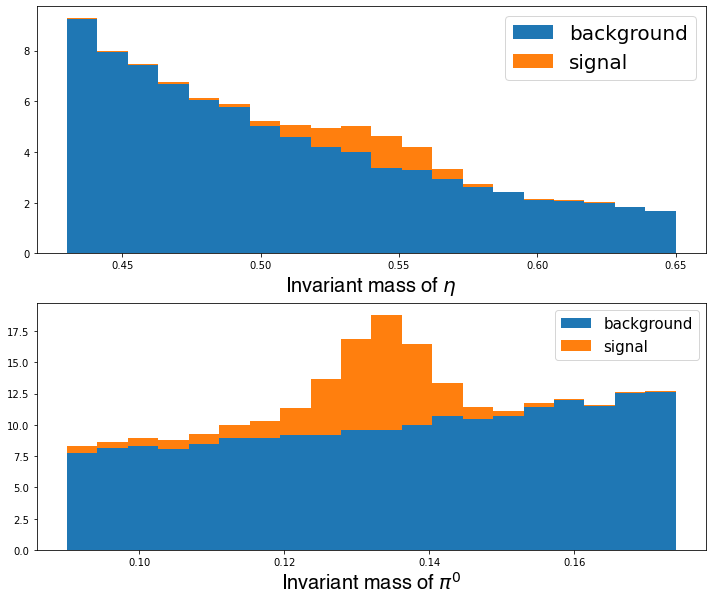

In [61]:
# plotting the invariant mass of eta for both signal and background
# Note: signal is the combination of signal and peaking background

# Invariant mass od eta: sihnal + peaking background of both B0 and B1

# eta
eta_sig_InvM = pd.concat(
    [
        df.loc['signal']['pi4_B0_InvM'],df.loc['signal']['pi4_B1_InvM'],
        df.loc['peaking background']['pi4_B0_InvM'],df.loc['peaking background']['pi4_B1_InvM']
    ]
)
# Invariant mass of eta: combinatorial background of both B0 and B1
eta_bkg_InvM = pd.concat([df.loc['combinatorial background']['pi4_B0_InvM'],df.loc['combinatorial background']['pi4_B1_InvM']])

# pi0
pi0_sig_InvM = pd.concat(
    [
        df_pi0.loc['signal']['pi4_B0_InvM'],df_pi0.loc['signal']['pi4_B1_InvM'],
        df_pi0.loc['peaking background']['pi4_B0_InvM'],df_pi0.loc['peaking background']['pi4_B1_InvM']
    ]
)

pi0_bkg_InvM = pd.concat(
    [
        df_pi0.loc['combinatorial background']['pi4_B0_InvM'],df_pi0.loc['combinatorial background']['pi4_B1_InvM']
    ]
)


x = np.arange(0.43, 0.65, 0.01)
plt.figure(figsize=(12, 10))
plt.subplot(211)
bin_value, bin_edge, _ = plt.hist([eta_bkg_InvM,eta_sig_InvM],label=['background','signal'], histtype='barstacked',density=True, bins=20)
plt.xlabel('Invariant mass of $\eta$', fontdict=form_label)
plt.legend(fontsize='20')

plt.subplot(212)
bin_value_pi0, bin_edge_pi0, _ = plt.hist(([pi0_bkg_InvM, pi0_sig_InvM]), histtype='barstacked', label=['background','signal'],density=True, bins=20)
plt.xlabel('Invariant mass of $\pi^0$', fontdict=form_label)
plt.legend(fontsize='15')

In [49]:
print(sum(bin_value[1]))
print('number of signal and background for eta: ',len(df.loc['signal'])+len(df.loc['peaking background']), len(df.loc['combinatorial background']))
print('number of signal and background for pion: ',len(df_pi0.loc['signal'])+len(df_pi0.loc['peaking background']), len(df_pi0.loc['combinatorial background']))

90.91343679056342
number of signal and background for eta:  3713 55683
number of signal and background for pion:  19833 98272


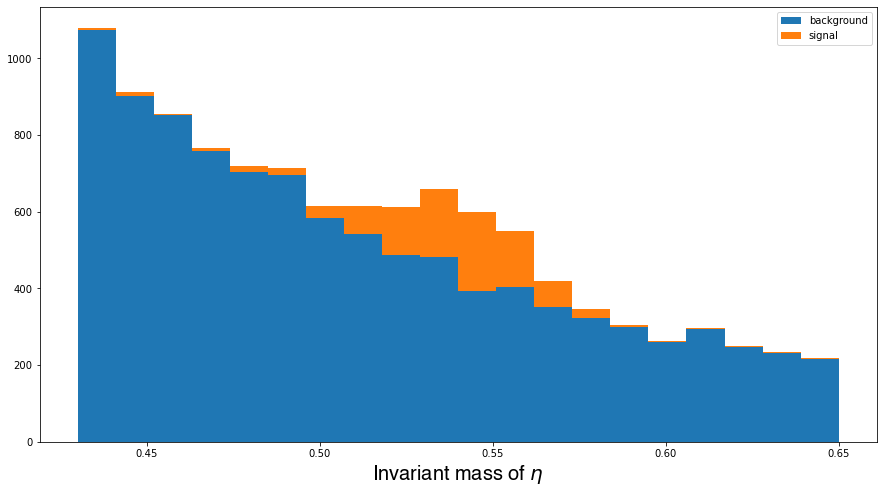

In [13]:
# signal and background of eta

etatrue_Bp_InvM=pd.concat([df_eta_Bp.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   df_eta_Bp.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
etafalse_Bp_InvM=pd.concat([df_eta_Bp.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   df_eta_Bp.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

etatrue_B0_InvM=pd.concat([df_eta_B0.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   df_eta_B0.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
etafalse_B0_InvM=pd.concat([df_eta_B0.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   df_eta_B0.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

etatrue_InvM = pd.Series.to_list(etatrue_Bp_InvM)+pd.Series.to_list(etatrue_B0_InvM)
etafalse_InvM = pd.Series.to_list(etafalse_Bp_InvM)+pd.Series.to_list(etafalse_B0_InvM)

plt.figure(figsize=(15, 8))
plt.hist([etafalse_InvM,etatrue_InvM], histtype='barstacked', label=['background', 'signal'], bins=20)
plt.xlabel('Invariant mass of $\eta$', fontdict=form_label)
plt.legend()


## Fitting

In [ ]:
# functions

# normal distribution
def gaussian(x, amp, mu, sigma):
    return ( amp / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2)) )

# exponential distribution
def exp_curve(x, a, b, c):
    return ( a * np.exp(b * x) + c )

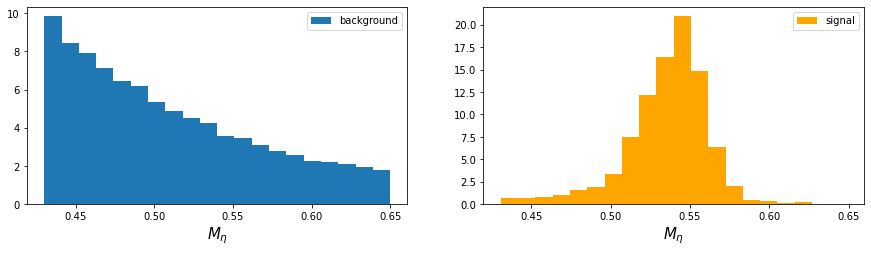

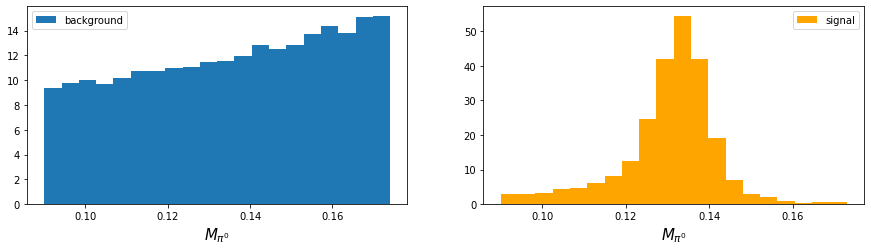

In [83]:
import scipy.integrate as integrate

plt.figure(figsize=(15,8))
# eta
# data background
plt.subplot(221)
value_bkg, bin_bkg, _ = plt.hist(eta_bkg_InvM, histtype='barstacked', density=True, bins=20,label='background')
y_data_bkg=value_bkg

plt.xlabel('$M_\eta$', fontdict=form_title)
plt.legend()

# data signal
plt.subplot(222)
value_sig, bin_sig, _ = plt.hist(eta_sig_InvM, histtype='barstacked', density=True, bins=20, label='signal', color='orange')
y_data_sig=value_sig

plt.xlabel('$M_\eta$', fontdict=form_title)
plt.legend()
plt.show()

plt.figure(figsize=(15,8))
# pi0
# data background
plt.subplot(223)
value_bkg_pi0, bin_bkg_pi0, _ = plt.hist(pi0_bkg_InvM, histtype='barstacked', density=True, bins=20,label='background')
y_data_bkg_pi0=value_bkg_pi0

plt.xlabel('$M_{\pi^0}$', fontdict=form_title)
plt.legend()

# data signal
plt.subplot(224)
value_sig_pi0, bin_sig_pi0, _ = plt.hist(pi0_sig_InvM, histtype='barstacked', density=True, bins=20, label='signal', color='orange')
y_data_sig_pi0=value_sig_pi0

plt.xlabel('$M_{\pi^0}$', fontdict=form_title)
plt.legend()
plt.show()

In [84]:
# number of entries that goes to. signal
sum(value_sig)

91.75412170298782

In [65]:
# getting the middle value of bin_edge so the size of bin_value and bin_edge will be the same
n = len(value_bkg)
x_data = np.zeros((n), dtype=float)
for ii in range(n):
    x_data[ii] = (bin_bkg[ii+1]+bin_bkg[ii])/2

# pi0
n = len(value_bkg_pi0)
x_data_pi0 = np.zeros((n), dtype=float)
for ii in range(n):
    x_data_pi0[ii] = (bin_bkg_pi0[ii+1]+bin_bkg_pi0[ii])/2

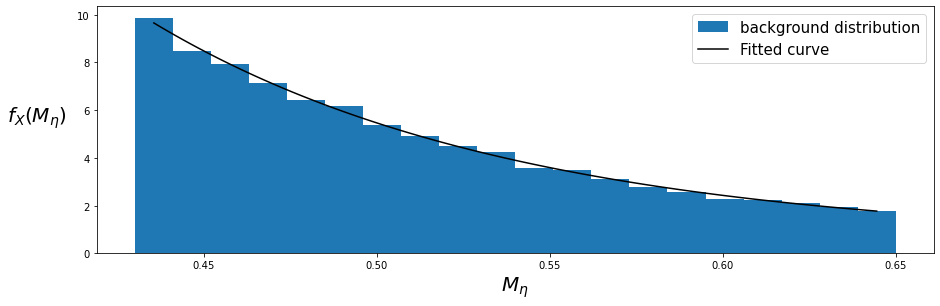

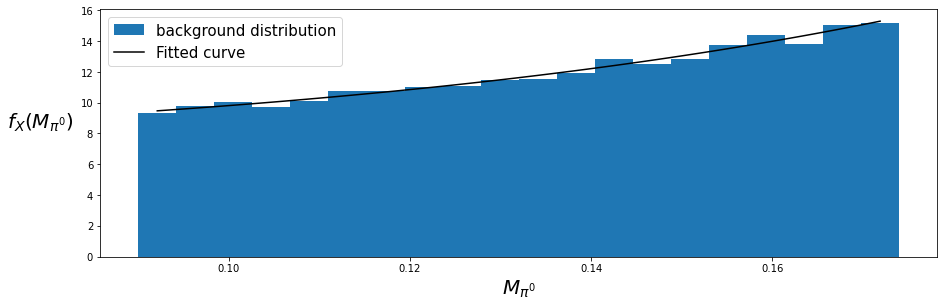

In [94]:
# fitting to background
from scipy.optimize import curve_fit

# Fit the function a * np.exp(b * x) + c to x_data and y_data
popt, pcov = curve_fit(lambda x,a,b,c: a * np.exp(b * x) + c, x_data, y_data_bkg)

# pi0
popt_pi0, pcov_pi0 = curve_fit(lambda x,a,b,c: a * np.exp(b * x) + c, x_data_pi0, y_data_bkg_pi0)

# the optimal values for background function
a_eta = popt[0]
b_eta = popt[1]
c_eta = popt[2]

# pi0
a_pi0 = popt_pi0[0]
b_pi0 = popt_pi0[1]
c_pi0 = popt_pi0[2]

# Create the fitted curve
x_fitted = np.linspace(np.min(x_data), np.max(x_data), 100)

# pi0
x_fitted_pi0 = np.linspace(np.min(x_data_pi0), np.max(x_data_pi0), 100)


# Plot
plt.figure(figsize=(15, 10))
plt.subplot(211)
# ax = plt.axes()
v_bkg, b_bkg, _ = plt.hist(eta_bkg_InvM, density=True, label='background distribution', bins=20)
# ax.scatter(x_data, y_data_bkg, label='background data', color='red')
plt.plot(x_fitted, exp_curve(x_fitted,a_eta,b_eta,c_eta), 'k', label='Fitted curve')
plt.xlabel('$M_\eta$', fontdict=form_label)
plt.ylabel('$f_X(M_\eta)$', fontdict=form_label, rotation=0, labelpad=40)
# ax.set_ylim(0, 20)
plt.legend(fontsize='15')

plt.figure(figsize=(15, 10))
plt.subplot(212)
plt.hist(pi0_bkg_InvM, density=True, label='background distribution', bins=20)
plt.plot(x_fitted_pi0, exp_curve(x_fitted_pi0,a_pi0,b_pi0,c_pi0), 'k', label='Fitted curve')
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.ylabel('$f_X(M_{\pi^0})$', fontdict=form_label, rotation=0, labelpad=40)
plt.legend(fontsize='15')

In [97]:
print('The area under the black function: ',integrate.quad(lambda x:exp_curve(x,a_eta,b_eta,c_eta),np.min(x_fitted), np.max(x_fitted))[0])
# get the width of each bin
bin_width = b_bkg[1] - b_bkg[0]
# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(v_bkg[:])
print('The area of the histogram: ', integral)

The area under the black function:  0.9364502586835312
The area of the histogram:  0.9999999999999991


The area under the black function:  0.9398645393225307


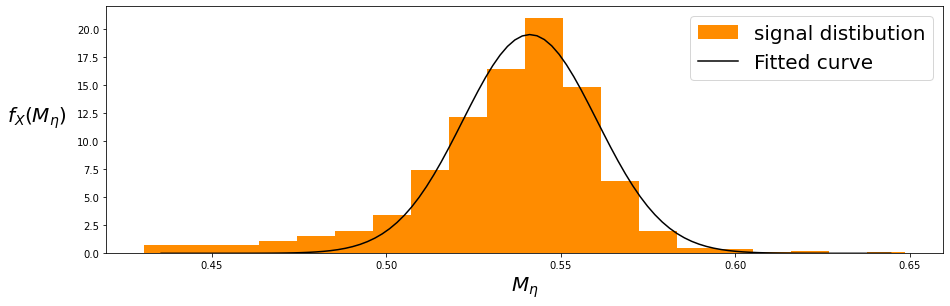

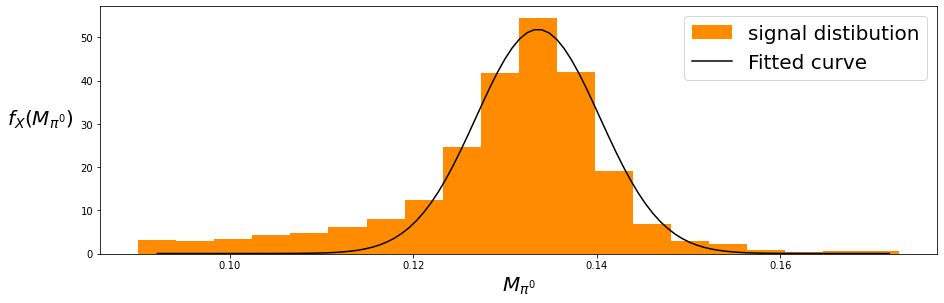

In [90]:
# fitting to signal

# Fit the function amp / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2) to x_data and y_data
popt, pcov = curve_fit(lambda x,amp,mu,sigma: amp / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2)), x_data, y_data_sig)

# pi0
popt_pi0, pcov_pi0 = curve_fit(lambda x,amp,mu,sigma: amp / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2)), x_data_pi0, y_data_sig_pi0)

# the optimal values for signal function
amp = popt[0]
mu = popt[1]
sigma = popt[2]

# pi0
amp_pi0 = popt_pi0[0]
mu_pi0 = popt_pi0[1]
sigma_pi0 = popt_pi0[2]

# creat the fitted curve
x_fitted = np.linspace(np.min(x_data), np.max(x_data), 100)
y_fitted = lambda x: amp / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x-mu)**2 / (2*sigma**2))
print('The area under the black function: ',integrate.quad(y_fitted,np.min(x_fitted), np.max(x_fitted))[0])

# pi0
x_fitted_pi0 = np.linspace(np.min(x_data_pi0), np.max(x_data_pi0), 100)
y_fitted_pi0 = lambda x: amp_pi0 / (np.sqrt(2*np.pi) * sigma_pi0) * np.exp(-(x-mu_pi0)**2 / (2*sigma_pi0**2))

# plot
plt.figure(figsize=(15, 10))
plt.subplot(211)
# ax = plt.axes()
# ax.scatter(x_data, y_data_sig, label='signal data', color='red')
v_sig, b_sig, _ = plt.hist(eta_sig_InvM, density=True, color='darkorange', label='signal distibution', bins=20)
plt.plot(x_fitted, y_fitted(x_fitted), 'k', label='Fitted curve')
plt.xlabel('$M_\eta$', fontdict=form_label)
plt.ylabel('$f_X(M_\eta)$', fontdict=form_label, rotation=0, labelpad=40)
# ax.set_ylim(0, 20)
plt.legend(fontsize='20')

plt.figure(figsize=(15, 10))
plt.subplot(212)
plt.hist(pi0_sig_InvM, density=True, color='darkorange', label='signal distibution', bins=20)
plt.plot(x_fitted_pi0, y_fitted_pi0(x_fitted_pi0), 'k', label='Fitted curve')
plt.xlabel('$M_{\pi^0}$', fontdict=form_label)
plt.ylabel('$f_X(M_{\pi^0})$', fontdict=form_label, rotation=0, labelpad=40)
plt.legend(fontsize='20')

In [91]:
print('The area under the black function: ',integrate.quad(y_fitted,np.min(x_fitted), np.max(x_fitted))[0])
# get the width of each bin
bin_width = b_sig[1] - b_sig[0]
# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(v_sig[:])
print('The area of the histogram: ', integral)
print('The area under the black function: ',integrate.quad(y_fitted_pi0,np.min(x_fitted_pi0), np.max(x_fitted_pi0))[0])

The area under the black function:  0.9398645393225307
1.0000000000000016
The area under the black function:  0.8780638800717327


In [68]:
# signal and background combined
y_data = bin_value[0]+(bin_value[1]-bin_value[0])
x_data = x_data

# pi0
y_data_pi0 = bin_value_pi0[0]+(bin_value_pi0[1]-bin_value_pi0[0])
x_data_pi0 = x_data_pi0

# with one parameter
popt, pcov = curve_fit(lambda x,p: p*gaussian(x,amp,mu,sigma) + (1-p)*exp_curve(x,a,b,c), x_data, y_data)
print(popt[0])

# pi0
popt_pi0, pcov_pi0 = curve_fit(lambda x,p: p*gaussian(x,amp_pi0,mu_pi0,sigma_pi0) + (1-p)*exp_curve(x,a_pi0,b_pi0,c_pi0), x_data_pi0, y_data_pi0)
print(popt_pi0[0])

# with two parameters
popt, pcov = curve_fit(lambda x,p1,p2: p1*gaussian(x,amp,mu,sigma) + p2*exp_curve(x,a,b,c), x_data, y_data)
p1 = popt[0]
p2 = popt[1]
pcov

0.06103793299005611
0.1558844416712087


array([[ 1.53201258e-05, -9.79088153e-06],
       [-9.79088153e-06,  3.44827017e-05]])

The area under the black function:  0.9366551155218712


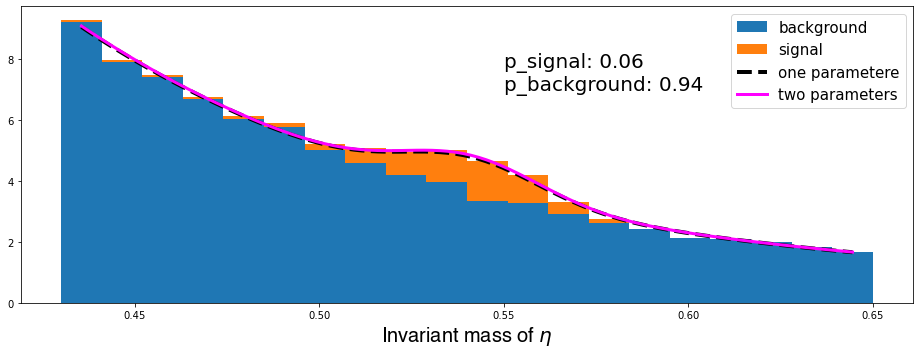

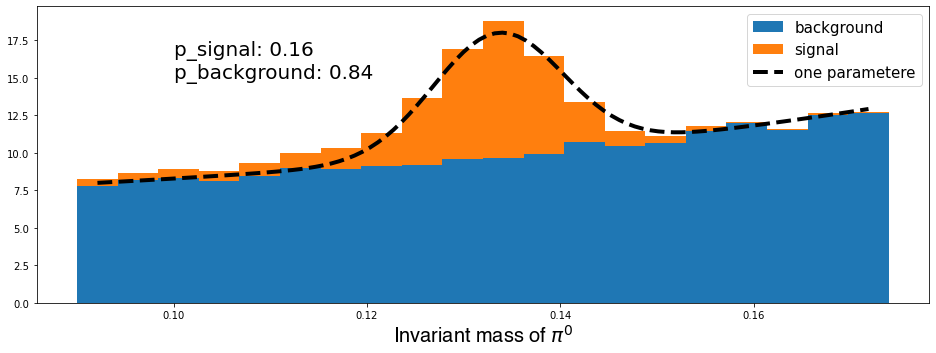

In [72]:
# both background and signal
from lmfit import Model 
from scipy.signal import find_peaks

x_fitted = np.linspace(np.min(x_data), np.max(x_data), 100)
x_fitted_pi0 = np.linspace(np.min(x_data_pi0), np.max(x_data_pi0), 100)

# mod = Model(gaussian) + Model(exp_curve)

#I just filled in some start values
# pars = mod.make_params(amp=1, mu=0.54, sigma=0.02, a=a, b=b, c=c)

truefsig = 0.06
y = lambda x : truefsig*gaussian(x,amp,mu,sigma) + (1-truefsig)*exp_curve(x,a,b,c)
z = lambda x : p1*gaussian(x,amp,mu,sigma) + p2*exp_curve(x,a,b,c)

# pi0
truefsig_pi0 = popt_pi0[0]
y_pi0 = lambda x : truefsig_pi0*gaussian(x,amp_pi0,mu_pi0,sigma_pi0) + (1-truefsig_pi0)*exp_curve(x,a_pi0,b_pi0,c_pi0)

# result = mod.fit(y, pars, x=x_fitted)
# print(result.params)
# x_fit=np.linspace(-30, 120, 500)
# comps_elem = result.eval_components(x=x_fit)
# comps_comb = result.eval(x=x_fit)

# plt.plot(x, y, 'bo')
print('The area under the black function: ',integrate.quad(y,np.min(x_fitted), np.max(x_fitted))[0])

plt.figure(figsize=(16,12))

plt.subplot(211)
plt.hist([eta_bkg_InvM,eta_sig_InvM], histtype='barstacked', density=True, bins=20, label=['background', 'signal'])
plt.plot(x_fitted, y(x_fitted), color='black', linestyle='dashed', linewidth=4, label='one parametere')
plt.plot(x_fitted, z(x_fitted), color='fuchsia', linewidth=3, label='two parameters')
plt.xlabel('Invariant mass of $\eta$', fontdict=form_label)
plt.text(0.55, 7, 'p_signal: 0.06\np_background: 0.94', fontsize=20)

plt.legend(fontsize='15')
plt.show()

plt.figure(figsize=(16,12))
plt.subplot(212)
plt.hist([pi0_bkg_InvM,pi0_sig_InvM], histtype='barstacked', density=True, bins=20, label=['background', 'signal'])
plt.plot(x_fitted_pi0, y_pi0(x_fitted_pi0), color='black', linestyle='dashed', linewidth=4, label='one parametere')
plt.xlabel('Invariant mass of $\pi^0$', fontdict=form_label)
plt.text(0.1, 15, 'p_signal: 0.16\np_background: 0.84', fontsize=20)

plt.legend(fontsize='15')
plt.show()

$ $